In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv(r"D:\IT\Data Science\Python\Affitech Technologies\Combined Data Sets For practice\Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
data.shape

(5000, 14)

In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
data = data.drop(columns = ['ZIP Code'], axis = 1)

In [9]:
corr = data.corr()
corr

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


<AxesSubplot:>

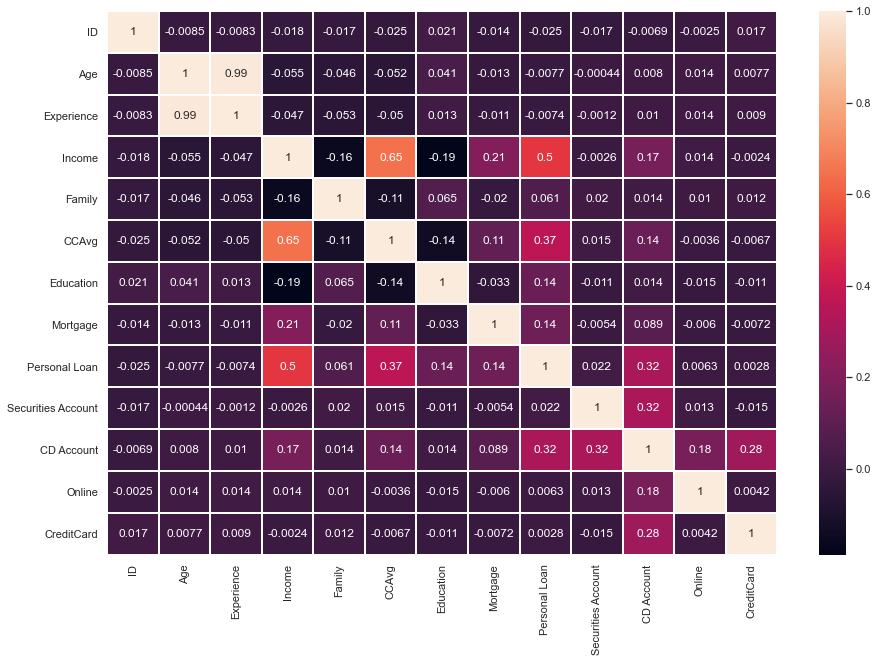

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels='auto', yticklabels='auto', annot = True, linewidth = 1)

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

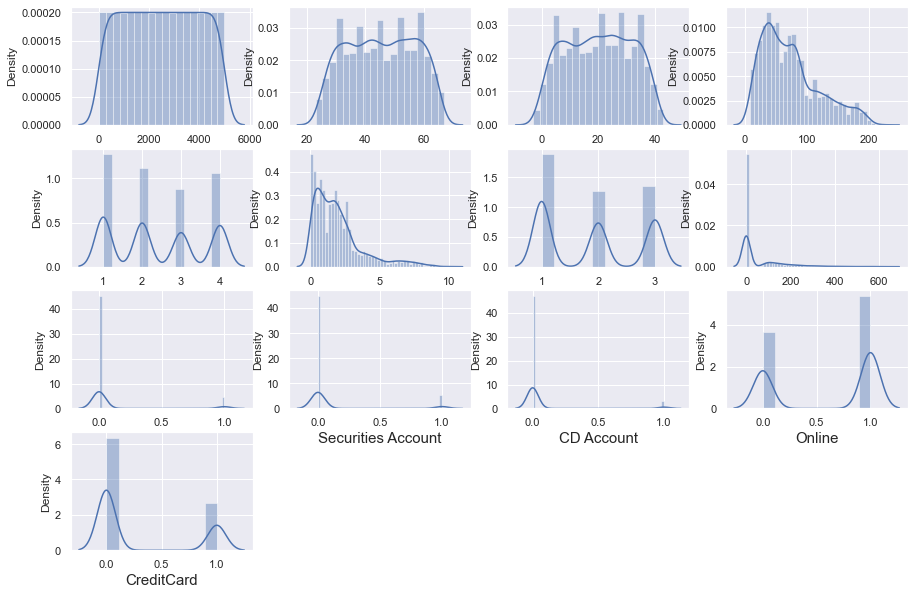

In [11]:
plt.figure(figsize = (15,10), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber +=1
plt.show()
        

<AxesSubplot:>

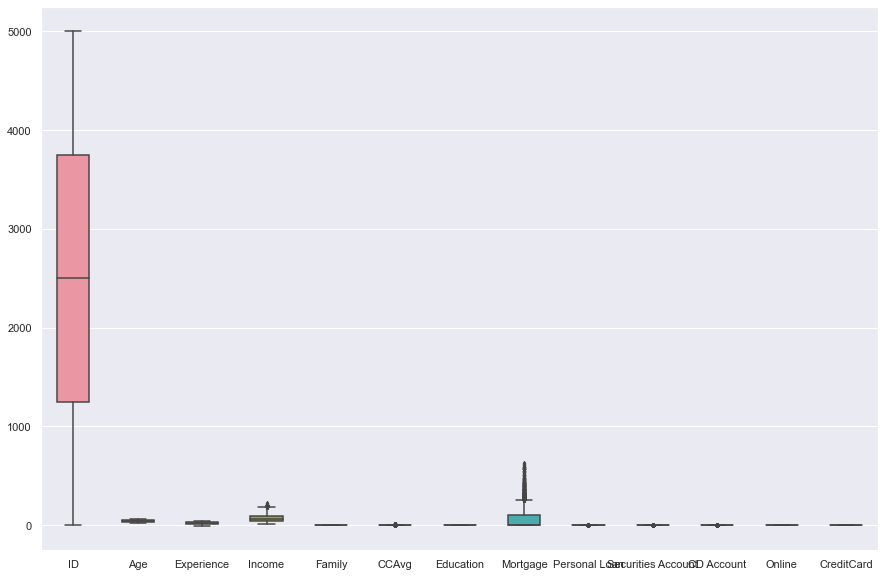

In [12]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3 )

In [13]:
q = data['Mortgage'].quantile(0.90)
data_cleaned = data[data['Mortgage'] < q]

q = data['Income'].quantile(0.99)
data_cleaned = data[data['Income'] < q]

<AxesSubplot:>

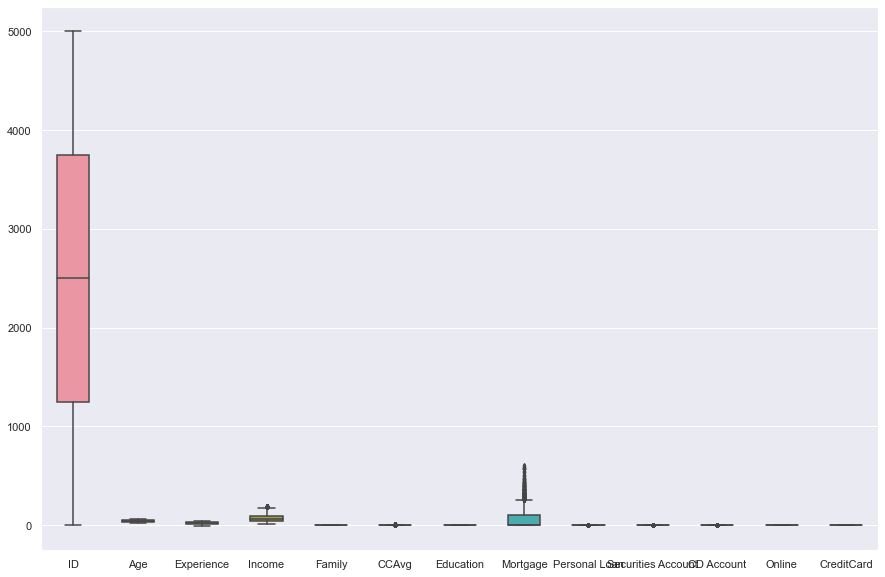

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data_cleaned, width = 0.5, ax = ax, fliersize = 3)

In [15]:
data['Personal Loan'].nunique()

2

In [16]:
df = data.drop(columns = ['Age'], axis = 1)
df

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,1,49,4,1.6,1,0,0,1,0,0,0
1,2,19,34,3,1.5,1,0,0,1,0,0,0
2,3,15,11,1,1.0,1,0,0,0,0,0,0
3,4,9,100,1,2.7,2,0,0,0,0,0,0
4,5,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,40,49,3,0.5,2,0,0,0,0,1,0


In [17]:
corr = df.corr()

<AxesSubplot:>

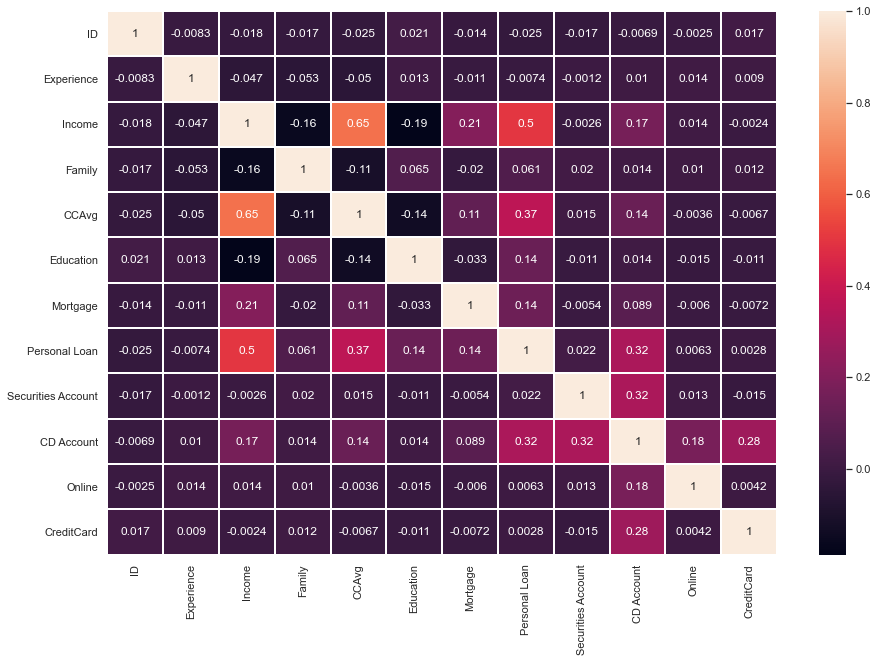

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels='auto', yticklabels='auto', annot = True, linewidth = 1)

In [19]:
X = df.drop(columns = ['Personal Loan'], axis = 1)
y = df['Personal Loan']

In [20]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
x_scaled

array([[-1.73170443, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73101161, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73031879, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.73031879,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.73101161,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 1.73170443, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [21]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.002174,ID
1,1.007440,Experience
2,1.854159,Income
3,1.033236,Family
4,1.724881,CCAvg
5,1.043324,Education
6,1.051373,Mortgage
7,1.137067,Securities Account
8,1.328906,CD Account
9,1.039506,Online


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 255)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [24]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [25]:
log_reg.score(x_test, y_test)

0.957

In [26]:
from sklearn.svm import SVC

In [27]:
clf = SVC()

clf.fit(x_train, y_train)

SVC()

In [29]:
clf.score(x_test, y_test)

0.978

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
dt_clf.score(x_test, y_test)

0.976

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rand_clf = RandomForestClassifier()

rand_clf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
rand_clf.score(x_test, y_test)

0.985

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.simplefilter("ignore")

In [39]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

[16:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgb.score(x_test, y_test)

0.987

In [45]:
param_grid = {'C': [0.1, 1, 10, 500, 1000, 5000], 'gamma' : [1.0, 0.5, 0.1, 0.01, 0.001]}

In [48]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, n_jobs = -1)

In [49]:
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 500, 1000, 5000],
                         'gamma': [1.0, 0.5, 0.1, 0.01, 0.001]})

In [50]:
grid_search.score(x_test, y_test)

0.985